In [1]:
# import modules
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pickle import dump
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

<ipython-input-1-7bb1d6a8315b>:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# train dataset
train = pd.read_csv('Corona_NLP_train.csv', encoding = "ISO-8859-1")
test= pd.read_csv('Corona_NLP_test.csv', encoding = "ISO-8859-1")

In [3]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [4]:
test.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People dance and sing together to stay positive. ? #CoronaVirus https://t.co/VLLqGI3R16,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable items? ECHO needs food donations. It is also looking for volunteers to pack boxes. Volunteers will be screened to be sure they don't have COVID-19. https://t.co/TST4Vjhbu4,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhiladelphia talking about her recent research on coronavirus' impact on the economy. Watch it here (starting at :33): https://t.co/8tfYNoro5l,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je rakyat assume 'lockdown' ke or even worst. Harini semua supermarket crowded like hell. Lagi mudah virus tu tersebar ?? #COVID2019,Extremely Negative
3797,3798,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to the safety of our employees and our end-users. We are monitoring COVID-19. Rest assured that tissue manufacturers are continuing to produce and ship products. https://t.co/qF6hclCAEq https://t.co/xyvbNsFeXA,Extremely Positive


In [5]:
# Combine datasets
train['train'] = 1
test['test'] = 0

In [6]:
combined = pd.concat([train, test]).reset_index(drop = True)

In [7]:
combined['Location'].fillna('Unknown', inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


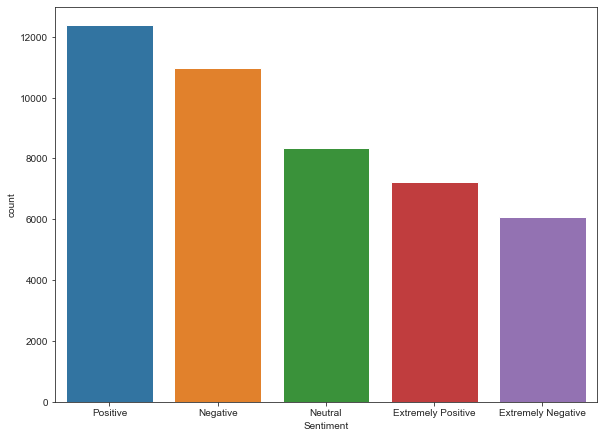

In [8]:
# Plot sentiment data
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(9.7, 7.27)
sns.countplot(combined['Sentiment'], order=combined['Sentiment'].value_counts(ascending=False).index, ax=ax)
plt.savefig('originalSentiments.png')
plt.show()

In [9]:
# check contribution of each category
sentiment_order=combined['Sentiment'].value_counts(normalize = True)
sentiment_order

Positive              0.275142
Negative              0.243755
Neutral               0.185341
Extremely Positive    0.160672
Extremely Negative    0.135091
Name: Sentiment, dtype: float64

In [12]:
# replace the extreme values
combined.replace({'Extremely Positive': 'Positive', 'Extremely Negative': 'Negative'}, inplace = True)

In [13]:
# rename columns to class and text
df = combined.rename(columns = {'OriginalTweet': 'text', 'Sentiment': 'class'})
df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020', '02-03-2020', '03-03-2020',
       '04-03-2020', '05-03-2020', '06-03-2020', '07-03-2020',
       '08-03-2020', '09-03-2020', '10-03-2020', '11-03-2020',
       '12-03-2020', '13-03-2020', '14-03-2020', '15-03-2020'],
      dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


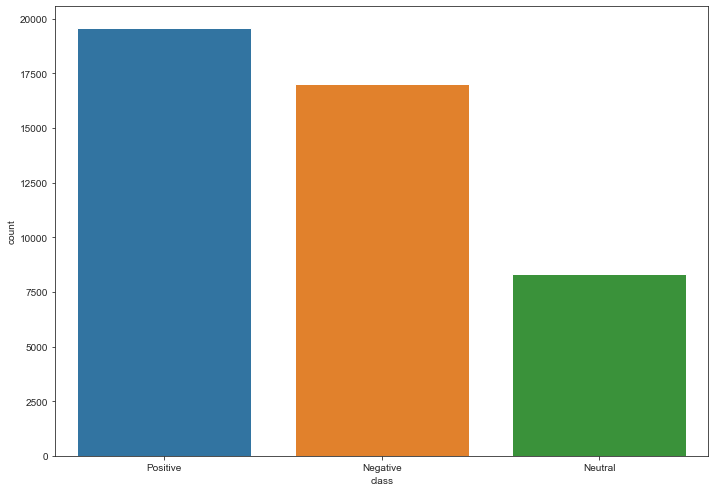

In [14]:
# Plot new sentiment data
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(df['class'], order=df['class'].value_counts(ascending=False).index, ax=ax)
plt.savefig('binarySentiments.png')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [16]:
# get list of labels for plotting confucion matrix
labels = df['class'].unique()
print(f'There are {len(labels)} labels in the dataset')

There are 3 labels in the dataset


In [17]:
# Count Vectorizer
cnt_vec = CountVectorizer(max_features=10000)
cnt_vec.fit(df['text'])
text_cnt_vec = cnt_vec.transform(df['text'])

In [18]:
pkl_filename = "main_cnt_vec.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(cnt_vec, file)

In [19]:
# TFID Transformer
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_cnt_vec)

In [20]:
# Save preprocessing-transformation
# dump(text_tfidf, open('text3_tfidf.pkl', 'wb'))

In [21]:
pkl_filename = "new_text3_tfidf.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(text_tfidf, file)

In [22]:
pkl_filename = "main_text3_tfidf.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf_transformer, file)

In [23]:
# Separate data into respective training and test sets
X_train = text_tfidf[df['train'] == 1]
X_test = text_tfidf[df['test'] == 0]

y_train = df['class'][df['train'] == 1]
y_test = df['class'][df['test'] == 0]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41157, 10000), (3798, 10000), (41157,), (3798,))

In [24]:
# Logistic Regression
clf_lr = LogisticRegression(max_iter = 1000)
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# cheeck the score
clf_lr_score = clf_lr.score(X_test, y_test)
print("Accuracy:", clf_lr_score)

Accuracy: 0.8062137967351237


In [26]:
# prediction
clf_lr_predict = clf_lr.predict(X_test)
clf_lr_predict

array(['Neutral', 'Positive', 'Positive', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [27]:
# Logistic Regression Gridsearch
grid_clf_lr = LogisticRegression(max_iter = 1200)
grid_values = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10]}
grid_lr = GridSearchCV(grid_clf_lr, param_grid=grid_values)

In [28]:
grid_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1200),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']})

In [29]:
# print best parameter after tuning 
print(grid_lr.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid_lr.best_estimator_) 

{'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10, max_iter=1200)


In [30]:
# check performance
grid_lr_predictions = grid_lr.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_lr_predictions)) 

              precision    recall  f1-score   support

    Negative       0.84      0.83      0.83      1633
     Neutral       0.75      0.70      0.72       619
    Positive       0.83      0.86      0.84      1546

    accuracy                           0.82      3798
   macro avg       0.81      0.80      0.80      3798
weighted avg       0.82      0.82      0.82      3798



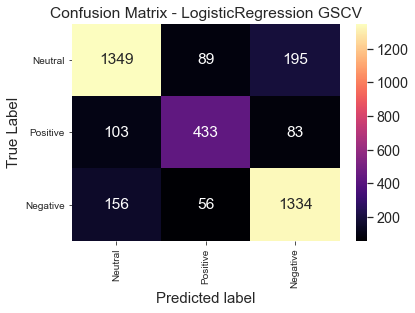

<Figure size 720x504 with 0 Axes>

In [31]:
# Plot confusion matrix

#import the relevant packages
from sklearn import metrics

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            grid_lr_predictions)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - LogisticRegression GSCV')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels, rotation = 90)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.savefig('cfm3-lrGSCV.png')
plt.show()

In [32]:
# Save model
dump(grid_lr, open('grid3_lr.pkl', 'wb'))

In [33]:
#####################

In [34]:
# LinearSVC

In [35]:
# Instantiate the model
clf_lvc = LinearSVC()
clf_lvc.fit(X_train, y_train)

LinearSVC()

In [36]:
pkl_filename = "linearSVC.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf_lvc, file)

In [37]:
score_lvc = clf_lvc.score(X_test, y_test)
print(f'Accurace:', score_lvc)

Accurace: 0.8317535545023697


In [38]:
# Predict
clf_lvc_predict = clf_lvc.predict(X_test)

In [39]:
clf_lvc_predict[:20]

array(['Neutral', 'Positive', 'Positive', 'Negative', 'Neutral',
       'Neutral', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive'],
      dtype=object)

In [40]:
# Grid search for linearSVC
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000]}  
  
grid_lvc = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_lvc.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.781, total=   0.3s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............................... C=0.1, score=0.783, total=   0.4s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ............................... C=0.1, score=0.781, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.783, total=   0.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.789, total=   0.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.812, total=   0.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.815, total=   0.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.808, total=   0.7s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.814, total=   0.8s
[CV] C=1 .............................................................
[CV] .

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] ............................... C=100, score=0.738, total=   6.9s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.753, total=   6.7s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.725, total=   7.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.732, total=   7.4s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.735, total=   7.4s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.718, total=   8.2s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.736, total=   8.3s
[CV] C=1000 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.7min finished


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             verbose=3)

In [41]:
# print best parameter after tuning 
print(grid_lvc.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid_lvc.best_estimator_) 


{'C': 1}
LinearSVC(C=1)


In [42]:
# check performance
grid_lvc_predictions = grid_lvc.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_lvc_predictions)) 

              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84      1633
     Neutral       0.78      0.71      0.74       619
    Positive       0.84      0.87      0.85      1546

    accuracy                           0.83      3798
   macro avg       0.82      0.81      0.81      3798
weighted avg       0.83      0.83      0.83      3798



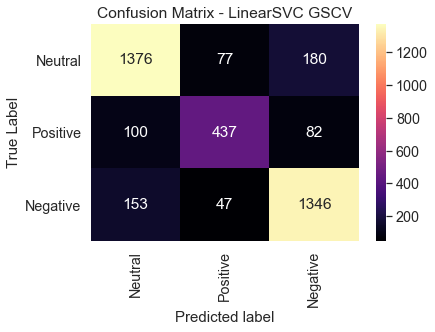

<Figure size 720x504 with 0 Axes>

In [43]:
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            grid_lvc_predictions)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - LinearSVC GSCV')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels, rotation = 90)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.savefig('cfm3-lvcGSCV.png')
plt.show()

In [44]:
# little improvement from original model
# Save the model

# dump(grid_lvc, open('grid3_lsvc.pkl', 'wb'))

In [45]:
pkl_filename = "new_grid3_lsvc.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_lvc, file)

In [46]:
##################################

In [47]:

# Naive Bayes
clf_nb = MultinomialNB(alpha=.01)
clf_nb.fit(X_train, y_train)



MultinomialNB(alpha=0.01)

In [48]:

clf_score = clf_nb.score(X_test, y_test)
print("Accuracy:", clf_score)



Accuracy: 0.6708794102159031


In [49]:

# RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)



RandomForestClassifier()

In [50]:

rf_score = rf.score(X_test, y_test)
print("Accuracy:", rf_score)



Accuracy: 0.665086887835703
